# Loading the data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data_train_sal = pd.read_csv("train_salaries_2013-03-07.csv")
    data_train_ftr = pd.read_csv("train_features_2013-03-07.csv")
    
    #data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Data Train Salary has {} samples with {} columns each.".format(*data_train_sal.shape)
    print "Data Train features has {} samples with {} features each.".format(*data_train_ftr.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    


Data Train Salary has 1000000 samples with 2 columns each.
Data Train features has 1000000 samples with 8 features each.


# Investigating the data

In [191]:
#Looking at the data I found that there are many 'NONE' values for 'degree' and 'major' column. I am sure most of the jobs require degree.
#So. thinking of deleteing all records for which 'degree' and 'major' columns are NONE where the jobTypes are: '
#'SENIOR','VICE PRESIDENT','JUNIOR','CTO','CEO','CFO','MANAGER' except 'JANITOR'
True

#data_train_ftr.drop(data_train_ftr[(data_train_ftr['degree'] == 'NONE')&(data_train_ftr['major'] == 'NONE')][(data_train_ftr['jobType']=='CFO')|(data_train_ftr['jobType']=='CTO')|(data_train_ftr['jobType']=='JUNIOR')|(data_train_ftr['jobType']=='MANAGER')|(data_train_ftr['jobType']=='VICE_PRESIDENT')|(data_train_ftr['jobType']=='CEO')|(data_train_ftr['jobType']=='SENIOR')][['degree', 'major','jobType']].index, inplace=)


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [63]:
#data_train_ftr.reset_index()

In [ ]:
# Also thinking of dropping rows for which degree - 'MASTERS', 'BACHELORS', 'DOCTORAL' and major is 'NONE"

In [193]:
#data_train_ftr.drop(data_train_ftr[data_train_ftr['major'] == 'NONE'][(data_train_ftr['degree']=='MASTERS')|(data_train_ftr['degree']=='BACHELORS')|(data_train_ftr['degree']=='DOCTORAL')].index, inplace = True)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [ ]:
#data_train_ftr.reset_index()

In [197]:
#data_train_ftr.shape

(767165, 8)

In [198]:
#finding None in Salary DataFrame

data_train_sal.replace('NONE', np.nan, inplace=True)

In [199]:
data_train_sal.isnull().any()

jobId     False
salary    False
dtype: bool

In [200]:
data_train_sal.shape

(1000000, 2)

In [201]:
#Investigating the uniqueness of job id
#data_train_sal.groupby(['jobId'], as_index=False).sum()
#data_train_sal.groupby(['jobId'], as_index=False).count()

# Merging the two datasets and investigating the merged dataset

In [3]:
data_features_salary = data_train_ftr.merge(data_train_sal, left_on='jobId', right_on='jobId', how='inner')

In [4]:
data_features_salary.count()

jobId                  1000000
companyId              1000000
jobType                1000000
degree                 1000000
major                  1000000
industry               1000000
yearsExperience        1000000
milesFromMetropolis    1000000
salary                 1000000
dtype: int64

In [5]:
#Jobid is just a unique identifier so we can drop it
data_features_salary.drop(['jobId'], axis=1, inplace=True)

In [6]:
data_features_salary.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [25]:
data_features_salary.shape

(1000000, 8)

In [62]:
#Decision taken: 
#I decided not to delete records for "data_train_ftr" dataframe/  "train_features_2013-03-07.csv" file for which the 
#values for "degree" and "major" are None
#If I delete these records and train a model, my model will not be able predict the salaries for new records with 
#"NONE" values for 'degree' and 'major'. As both the "train_features_2013-03-07.csv" and 
#"test_features_2013-03-07.csv" files have 'NONE' values for 'degree' and 'major' columns.


# CONVERTING CATEGORICAL TO NUMERICAL COLUMNS

In [7]:
from sklearn import preprocessing

le_cid = preprocessing.LabelEncoder()
le_jty = preprocessing.LabelEncoder()
le_deg = preprocessing.LabelEncoder()
le_mjr = preprocessing.LabelEncoder()
le_idr = preprocessing.LabelEncoder()

le_cid.fit(data_features_salary['companyId'])
le_jty.fit(data_features_salary['jobType']) 
le_deg.fit(data_features_salary['degree'])
le_mjr.fit(data_features_salary['major'])
le_idr.fit(data_features_salary['industry'])

from sklearn.externals import joblib
joblib.dump(le_cid, 'le_cid.pkl', compress=1)
joblib.dump(le_jty, 'le_jty.pkl', compress=1)
joblib.dump(le_deg, 'le_deg.pkl', compress=1)
joblib.dump(le_mjr, 'le_mjr.pkl', compress=1)
joblib.dump(le_idr, 'le_idr.pkl', compress=1)

data_features_salary['companyId'] = le_cid.transform(data_features_salary['companyId'] )
data_features_salary['jobType'] = le_jty.transform(data_features_salary['jobType'])
data_features_salary['degree'] = le_deg.transform(data_features_salary['degree'])
data_features_salary['major'] = le_mjr.transform(data_features_salary['major'])
data_features_salary['industry'] = le_idr.transform(data_features_salary['industry'])


In [41]:
data_features_salary.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,31,1,3,6,3,10,83,130
1,11,0,2,7,6,3,73,101
2,48,7,1,8,3,10,38,137
3,32,5,1,2,0,8,17,142
4,60,7,0,8,2,8,16,163


# UNIVARIATE FEATURE ANALYSIS USING FILTER METHOD

# feature analysis for the categorical data

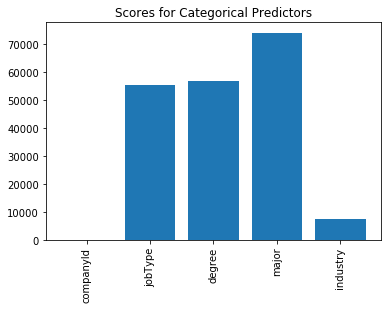

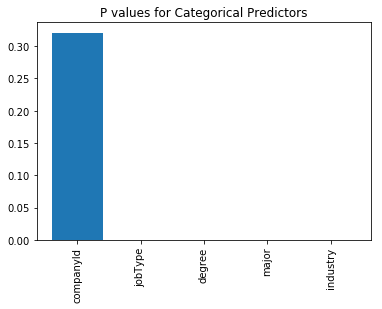

In [49]:
# The most of the feature columns - CompanyId, JobType, degree, major, industry are categorical column and the target
# salary is a continous variable -- I will use ANOVA statistical analysis to find the co-relation between the categorical variables
# and the target continuous variable
import numpy as np
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
import matplotlib.pyplot as plt
%matplotlib inline

cat_feature_salary = data_features_salary.filter(['companyId', 'jobType', 'degree', 'major', 'industry'], axis=1)
y_sal = data_features_salary['salary']
predictors = list(cat_feature_salary.columns.values)

selector = SelectKBest(f_regression, k=5)
selector.fit(cat_feature_salary, y_sal)
scores_f_regressor = selector.scores_
scores_p_values = selector.pvalues_ 

plt.bar(range(len(predictors)), scores_f_regressor)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.title('Scores for Categorical Predictors')
plt.show()


plt.bar(range(len(predictors)), scores_p_values)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.title('P values for Categorical Predictors')
plt.show()


In [24]:
#Standalone F regression

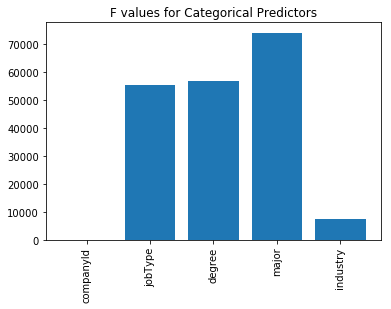

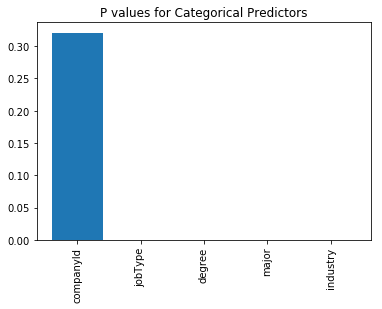

In [48]:
F, p_val = f_regression(cat_feature_salary, y_sal, center=True)


plt.bar(range(len(predictors)), F)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.title('F values for Categorical Predictors')
plt.show()


plt.bar(range(len(predictors)), p_val)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.title('P values for Categorical Predictors')
plt.show()

# feature analysis for continous variables

In [245]:
# From the two plots what I can infer is major, degree, jobType, and industry have high co-relation with Salary in decreasing order
# hence have very low p-values close to zero and hence companyid (highest p value) may not be having strong co-relations with Salary 

# For the contious variables - yearsExperience, milesFromMetropolis I would like to use some sort of co-relation metric
# to understand the co-relation with Salary

cont_feature_sal = data_features_salary.filter(['yearsExperience', 'milesFromMetropolis', 'salary'], axis=1)

cont_feature_sal.corr(method = 'pearson')

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


In [ ]:
# From this co-relation metric it seems like "yearsExperience" has a good positive co-relation with "salary" and 
#"milsFRomMetropolis" has negative co-relation with salary. I will keep both of them for my final model

In [34]:
#scatter plots between the continous features

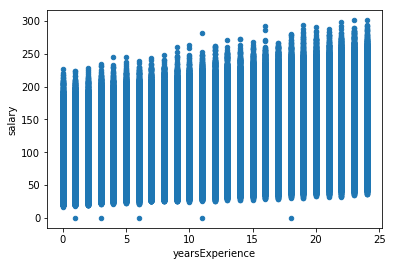

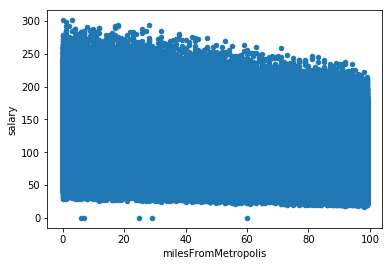

In [246]:
data_features_salary.plot.scatter(x = 'yearsExperience', y = 'salary')
data_features_salary.plot.scatter(x = 'milesFromMetropolis', y = 'salary')

In [ ]:
#From the above plots we can also infer that the contious features do not interact linearly

# Building a Supervised Learning Model

# Train , test  shuffle split with crossvalidation

In [8]:
#Based on the univariate feature analysis above, I am going to drop "companyid" from my feature set and ofcourse jobid
# as jobid is just a unique identifier

features = data_features_salary.filter(['jobType','degree','major','industry','yearsExperience', 'milesFromMetropolis'], axis=1)

target = data_features_salary['salary']

#test train Shuffle split 90% train and 10% test

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.10, random_state=42)

print "Training set has {} samples.".format(X_train.shape[0])
print "Test set has {} samples.".format(X_test.shape[0])

Training set has 900000 samples.
Test set has 100000 samples.


/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
# Test train split with Company Id Included

features_ci = data_features_salary.filter(['companyId','jobType','degree','major','industry','yearsExperience', 'milesFromMetropolis'], axis=1)


#test train Shuffle split 90% train and 10% test

from sklearn.cross_validation import train_test_split

X_train_ci, X_test_ci, y_train_ci, y_test_ci = train_test_split(features_ci, target, test_size=.10, random_state=42)

print "Training set has {} samples.".format(X_train_ci.shape[0])
print "Test set has {} samples.".format(X_test_ci.shape[0])

Training set has 900000 samples.
Test set has 100000 samples.


# Helper methods for Modelling

In [44]:
from sklearn.metrics import r2_score
from time import time
def train_regressor(rgr, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    rgr.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_values(rgr, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = rgr.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    #return f1_score(target.values, y_pred, pos_label='yes')
    #return f1_score(target.values, y_pred, pos_label=None, average='weighted')
    return r2_score(target.values, y_pred)


def train_predict(rgr, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(rgr.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_regressor(rgr, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "R2 Score for training set: {:.4f}.".format(predict_values(rgr, X_train, y_train))
    print "R2 score for test set: {:.4f}.".format(predict_values(rgr, X_test, y_test))

# MODELLING

- MODEL REASONING: I am thinking of modelling a "RANDOM FOREST" or a "GRADIENT BOOSTING" Regressor. The reason I am think of using a Decision tree based bagging or boosting model : a) Most of the features in the dataset are categorical and categorical features(nominal data) do not have linear interactions. b) The two continous variables("yearsExperience" & "milesFromMetropolis") do not interact linearly with the target variable("salary") as well. So, overall a linear model like a multi variate linear regression or "Support Vector Machine with a linear Kernel" would not suffice. I might as well try "Suppor Vector Machine with a Non-linear Kernal such RBF" later. lets see.....

In [10]:
# Import the three supervised learning models from sklearn 
# For RandomForest and Gradient Boosting I will start with the default parameters, Later I will see
# if I would need to perform hyper paremeter tuning with gridsearch to improve score on the test set

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# TODO: Initialize the three models
rgr_A = RandomForestRegressor(n_estimators=300, #max_features = "sqrt",min_samples_split = 10,min_samples_leaf = 10,
                              #max_depth = 30,
                              n_jobs=-1,
                              random_state = 42)

rgr_B = GradientBoostingRegressor(n_estimators = 600, random_state = 42)

#train_predict(rgr_A, X_train, y_train, X_test, y_test)
    
#train_predict(rgr_B, X_train, y_train, X_test, y_test)
    
from sklearn.model_selection import cross_val_score

print(cross_val_score(rgr_B, X_train, y_train))

#RF [ 0.70287521  0.70221358  0.70393776]

[ 0.75983009  0.75974597  0.76019741]


In [256]:
joblib.dump(rgr_A, 'rf_regressor_96_train_72_test.pkl', compress=1)

['rf_regressor_96_train_72_test.pkl']

In [250]:
#trying to improve the accuracy og the GB Regressor with 2000 boosting stages or estimators
rgr_B1 = GradientBoostingRegressor(n_estimators = 2000, random_state = 42)

train_predict(rgr_B1, X_train, y_train, X_test, y_test)

Training a GradientBoostingRegressor using a training set size of 900000. . .
Trained model in 873.4390 seconds
Made predictions in 27.6256 seconds.
R2 Score for training set: 0.7635.
Made predictions in 3.0773 seconds.
R2 score for test set: 0.7645.


In [260]:
joblib.dump(rgr_B1, 'gb_regressor_7635_train_7645_test.pkl', compress=1)

['gb_regressor_7635_train_7645_test.pkl']

In [58]:
#Feature importnace without companyID
from sklearn.ensemble import GradientBoostingRegressor

rgr_B1 = joblib.load('gb_regressor_7635_train_7645_test.pkl')
print rgr_B1.feature_importances_

#feature imporantance without companyid  after training the model with company id
rgr_B2 = GradientBoostingRegressor(n_estimators = 2000, random_state = 42)

train_predict(rgr_B2, X_train_ci, y_train_ci, X_test_ci, y_test_ci)
print rgr_B2.feature_importances_


[ 0.12969911  0.05394687  0.29041135  0.22520847  0.15693564  0.14379856]
Training a GradientBoostingRegressor using a training set size of 900000. . .
Trained model in 978.4158 seconds
Made predictions in 25.2221 seconds.
R2 Score for training set: 0.7634.
Made predictions in 2.7885 seconds.
R2 score for test set: 0.7643.
[ 0.06121651  0.12295385  0.05052422  0.28186786  0.20128709  0.13519009
  0.14696039]


In [46]:
#Training an Adaboost regressor

from sklearn.ensemble import AdaBoostRegressor
rgr_ada = AdaBoostRegressor(n_estimators = 600, random_state = 42)
train_predict(rgr_ada, X_train, y_train, X_test, y_test)


Training a AdaBoostRegressor using a training set size of 900000. . .
Trained model in 53.2657 seconds
Made predictions in 4.1765 seconds.
R2 Score for training set: 0.5101.
Made predictions in 0.5002 seconds.
R2 score for test set: 0.5142.


In [ ]:
# Adaboost is the worst model so far so I will reject Adaboost. So my candidates for my model so a far are Random Forest 
# and Gradient Boosting

## Grid search with k fold cross validation for the RandomForest Regressor

In [251]:
#Helper functions for gridsearch and performance metric
def train_regressor_gridsearch(rgr, parameters, scorer, X_train, y_train):
    print "Performing RandomForest Randomized gridsearch"
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.10, random_state=0)
    n_iter_search = 20
    grid_obj = RandomizedSearchCV(estimator=rgr, param_distributions=parameters, n_iter=n_iter_search, scoring=scorer, cv=cv)
    grid_obj = grid_obj.fit(X_train, y_train)
    print "Done with Gridsearch"
    rgr_out = grid_obj.best_estimator_
    return rgr_out

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [252]:
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
param = {'learning_rate' : [.004,.005,.006, .007], 
         'n_estimators' : [600,900,1300], 
         'max_depth' : range(1, 11)}
                  
parameters = param
scoring_fnc = make_scorer(performance_metric)
rgr_RB1 = RandomForestRegressor(random_state = 42)  

train_regressor = train_regressor_gridsearch(rgr_RB1, parameters, scoring_fnc, X_train, y_train)

"\nfrom sklearn.metrics import make_scorer\nfrom sklearn.cross_validation import ShuffleSplit\nfrom sklearn.grid_search import GridSearchCV, RandomizedSearchCV\nparam = {'learning_rate' : [.004,.005,.006, .007], \n         'n_estimators' : [600,900,1300], \n         'max_depth' : range(1, 11)}\n                  \nparameters = param\nscoring_fnc = make_scorer(performance_metric)\nrgr_B1 = GradientBoostingRegressor(random_state = 42)  \n\ntrain_regressor = train_regressor_gridsearch(rgr_B1, parameters, scoring_fnc, X_train, y_train)\n"

# Not so happy with the performance of either RandomForest Regressor train score - .96, test_score - .72 (Looks like the model is slightly overfitting) and  Gradient boosting Regressor train and test score are : .76

- so going to try out Mulilayer Perceptron Neural Network Regressor available as an Sklearn with the hope that I would end up getting a better model compared to RF or GB 

# Multi Layer Perceptron
- starting off with all default parameters

In [33]:
#We want to use all the features for a neural network to learn the interactions between features on its own
from sklearn.preprocessing import StandardScaler

features = data_features_salary.drop(['salary'], axis=1)

target = data_features_salary['salary']

#test train Shuffle split 90% train and 10% test

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.10, random_state=42)

#we must normalize the features for neural network models, they use gradient descent to optimize the cost function, 
#the shape of the contour could be very elongated then uniform. This could delay or make it difficult for Gradient Descent to
#reach the global minima then when the contour is uniform

X_train_std = StandardScaler().fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std)

X_test_std = StandardScaler().fit_transform(X_test)
X_test_std = pd.DataFrame(X_test_std)


print "Training set has {} samples.".format(X_train.shape[0])
print "Test set has {} samples.".format(X_test.shape[0])

from sklearn.neural_network import MLPRegressor
#rgr_nn = MLPRegressor(hidden_layer_sizes = (300,150,70,20), max_iter = 3000, learning_rate = 'adaptive',learning_rate_init = 0.009, 
                      #tol = 1e-6)
    
# Results below
"""
Training set has 900000 samples.
Test set has 100000 samples.
Training a MLPRegressor using a training set size of 900000. . .
Trained model in 2152.6810 seconds
Made predictions in 16.8918 seconds.
R2 Score for training set: 0.7582.
Made predictions in 1.8715 seconds.
R2 score for test set: 0.7595.
"""
    
rgr_nn = MLPRegressor(hidden_layer_sizes = (500,280,150,70,20), max_iter = 4000, learning_rate = 'adaptive',learning_rate_init = 0.009, 
                      tol = 1e-6)
train_predict(rgr_nn, X_train_std, y_train, X_test_std, y_test)

#Results below

"""
Training set has 900000 samples.
Test set has 100000 samples.
Training a MLPRegressor using a training set size of 900000. . .
Trained model in 4814.4090 seconds
Made predictions in 37.2603 seconds.
R2 Score for training set: 0.7617.
Made predictions in 3.5841 seconds.
R2 score for test set: 0.7632.

"""

Training set has 900000 samples.
Test set has 100000 samples.
Training a MLPRegressor using a training set size of 900000. . .
Trained model in 4814.4090 seconds
Made predictions in 37.2603 seconds.
R2 Score for training set: 0.7617.
Made predictions in 3.5841 seconds.
R2 score for test set: 0.7632.


In [34]:
joblib.dump(rgr_nn, 'nn_regressor_7617_train_7632_test.pkl', compress=1)

['nn_regressor_7617_train_7632_test.pkl']

In [138]:
X_train_std.head()
features.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,31,1,2,6,3,10,83
1,48,6,1,7,3,10,38
2,32,4,1,2,0,8,17
3,60,6,0,7,2,8,16
4,7,4,1,3,2,2,31


# Predicting the Salary on the test Datasets

In [9]:
# We will use the GradientBoosting Regressor

#loading the categoricals pickle transforms 
from sklearn.externals import joblib
ld_jty = joblib.load('le_jty.pkl')
ld_deg = joblib.load('le_deg.pkl')
ld_mjr = joblib.load('le_mjr.pkl')
ld_idr = joblib.load('le_idr.pkl')


import pandas as pd
#loading the data
data_test_ftr = pd.read_csv("test_features_2013-03-07.csv")


#transforming the categorical to numerical values

data_test_ftr['jobType'] = ld_jty.transform(data_test_ftr['jobType'])
data_test_ftr['degree'] = ld_deg.transform(data_test_ftr['degree'])
data_test_ftr['major'] = ld_mjr.transform(data_test_ftr['major'])
data_test_ftr['industry'] = ld_idr.transform(data_test_ftr['industry'])


In [10]:
#invetigate the data
data_test_ftr.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,5,2,7,3,22,73
1,JOB1362685407688,COMP13,4,4,7,0,20,47
2,JOB1362685407689,COMP10,2,3,0,3,17,9
3,JOB1362685407690,COMP21,5,2,7,4,14,96
4,JOB1362685407691,COMP36,4,1,0,4,10,44


In [12]:
#Load the Gradient Boosting Regressor, I chose 
from sklearn.externals import joblib
ld_gb_rgr = joblib.load('gb_regressor_7635_train_7645_test.pkl')
data_test_ftr['salary'] = ld_gb_rgr.predict(data_test_ftr[['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']])

In [15]:
data_test_ftr[['jobId','salary']].head()

,jobId,salary
0,JOB1362685407687,110.990294
1,JOB1362685407688,92.871936
2,JOB1362685407689,182.130105
3,JOB1362685407690,104.222946
4,JOB1362685407691,114.865916


In [18]:
#Creating the test_salaries.csv file
data_test_ftr['salary'] = data_test_ftr['salary'].apply(lambda x: round(x,2))
data_test_ftr[['jobId','salary']].to_csv('test_salaries.csv')
